In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from tensorflow.keras.datasets import cifar10

In [5]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

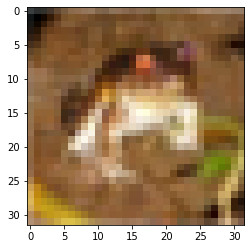

In [8]:
plt.imshow(X_train[0])

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[0]

array([6], dtype=uint8)

In [11]:
X_train.max()

255

In [12]:
X_train.min()

0

In [13]:
X_test.max()

255

In [14]:
X_train = X_train/255
X_test = X_test/255

In [24]:
X_train.shape

(50000, 32, 32, 3)

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [16]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [17]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss', patience = 2)

In [37]:
model.fit(X_train, y_cat_train, epochs = 15, validation_data = (X_test,y_cat_test), callbacks = [early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 93s 2ms/sample - loss: 1.5164 - accuracy: 0.4505 - val_loss: 1.2819 - val_accuracy: 0.5402
Epoch 2/15
50000/50000 [==============================] - 93s 2ms/sample - loss: 1.1938 - accuracy: 0.5760 - val_loss: 1.1364 - val_accuracy: 0.5921
Epoch 3/15
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.0417 - accuracy: 0.6356 - val_loss: 1.0539 - val_accuracy: 0.6368
Epoch 4/15
50000/50000 [==============================] - 88s 2ms/sample - loss: 0.9384 - accuracy: 0.6726 - val_loss: 1.0211 - val_accuracy: 0.6537
Epoch 5/15
50000/50000 [==============================] - 92s 2ms/sample - loss: 0.8517 - accuracy: 0.7046 - val_loss: 0.9904 - val_accuracy: 0.6601
Epoch 6/15
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.7780 - accuracy: 0.7282 - val_loss: 0.9930 - val_accuracy: 0.6660
Epoch 7/15
50000/50000 [==============================] 

In [43]:
metrics = pd.DataFrame(model.history.history)

In [44]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.516406,0.45050,1.281904,0.5402
1,1.193824,0.57604,1.136427,0.5921
2,1.041680,0.63556,1.053889,0.6368
3,0.938412,0.67264,1.021137,0.6537
4,0.851683,0.70456,0.990386,0.6601
5,0.778037,0.72822,0.993012,0.6660
6,0.715847,0.75028,0.965923,0.6775
7,0.653938,0.77080,1.004718,0.6748
8,0.597752,0.79082,1.026478,0.6789


In [45]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

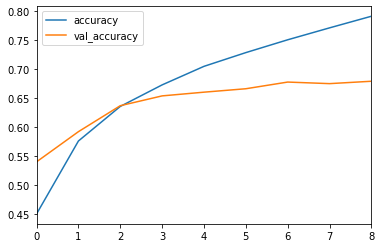

In [46]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

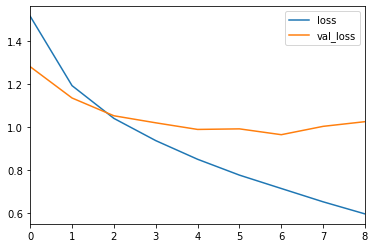

In [47]:
metrics[['loss', 'val_loss']].plot()

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
predictions = model.predict_classes(X_test)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1000
           1       0.84      0.73      0.78      1000
           2       0.75      0.42      0.54      1000
           3       0.46      0.54      0.50      1000
           4       0.58      0.67      0.62      1000
           5       0.61      0.56      0.58      1000
           6       0.71      0.81      0.76      1000
           7       0.71      0.72      0.72      1000
           8       0.77      0.77      0.77      1000
           9       0.71      0.81      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



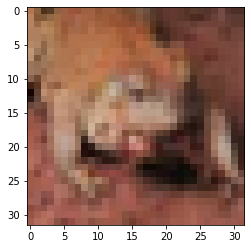

In [53]:
plt.imshow(X_test[5])

In [ ]:
y_test[5]

In [ ]:
model.predict_classes(X_test[5].reshape(1,32, 32, 3))